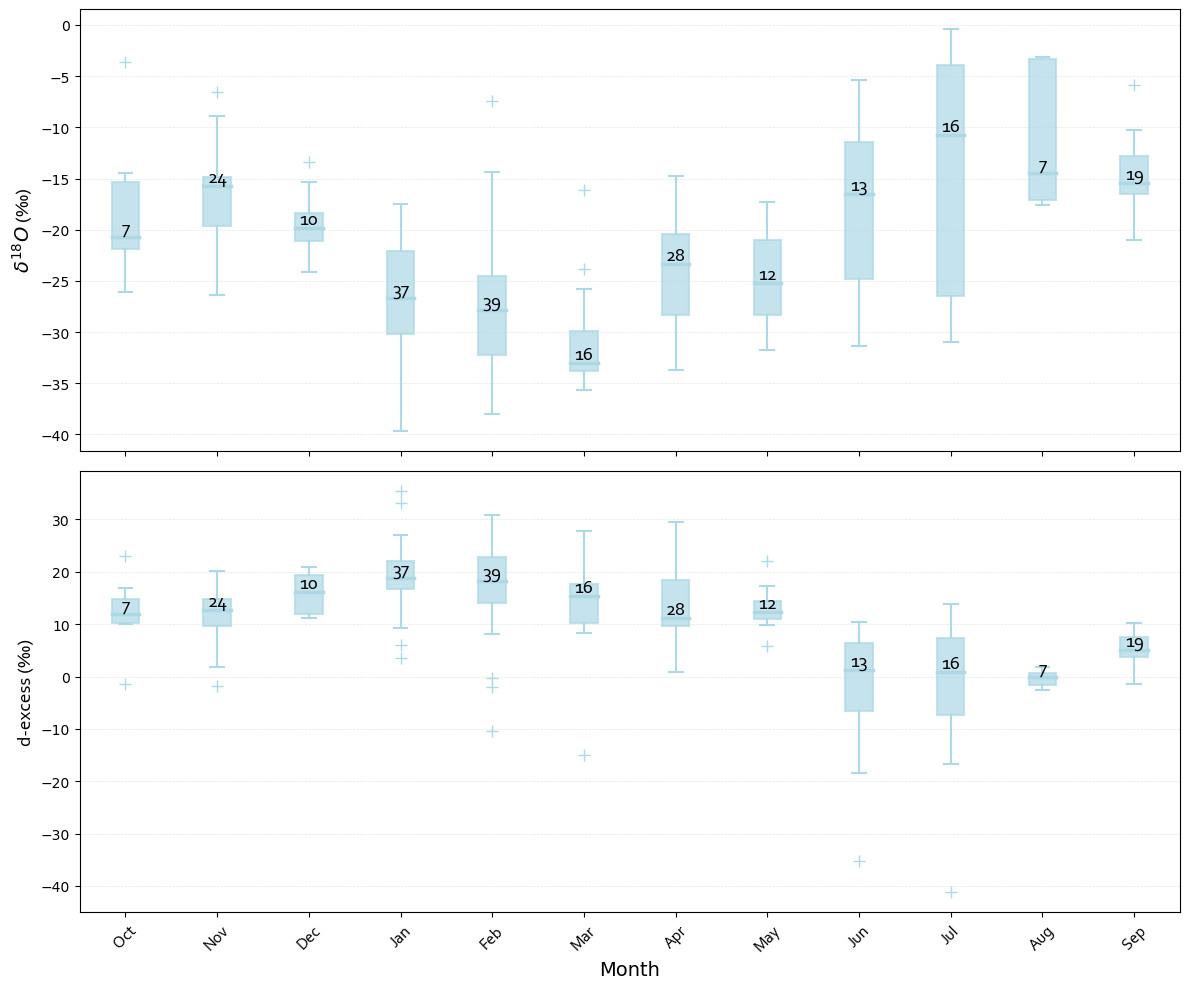

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Box/Surface_Snow_by_month.xlsx"
d18O_data = pd.read_excel(file_path, sheet_name='d18O')
d_excess_data = pd.read_excel(file_path, sheet_name='d-excess')

# Prepare the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Define month labels
month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# Function to plot customized boxplots
def plot_customized_boxplot(ax, data, color):
    bp = ax.boxplot([data[month].dropna() for month in data.columns], patch_artist=True, widths=0.3,
                    flierprops=dict(marker='+', markeredgecolor=color, markerfacecolor=color, markersize=8),
                    boxprops=dict(facecolor=color, alpha=0.7, edgecolor=color, linewidth=1.5),
                    whiskerprops=dict(color=color, linewidth=1.5),
                    capprops=dict(color=color, linewidth=1.5),
                    medianprops=dict(color=color, linewidth=2.5))

    # Adding number of samples on the median line
    for i, month in enumerate(data.columns):
        median_val = bp['medians'][i].get_ydata()[0]
        ax.text(i+1, median_val, f'{len(data[month].dropna())}',
                horizontalalignment='center', verticalalignment='bottom', 
                fontsize=14, fontname='Corbel', color='black')

    # Adding gridlines
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Plotting boxplot for d18O data
plot_customized_boxplot(axs[0], d18O_data, "#ADD8E6")
axs[0].set_ylabel('$\\delta^{18}O$ (‰)', fontname='Corbel', fontsize=14)

# Plotting boxplot for d-excess data
plot_customized_boxplot(axs[1], d_excess_data, "#ADD8E6")
axs[1].set_ylabel('d-excess (‰)', fontname='Corbel', fontsize=14)

# Setting the x-axis labels
axs[1].set_xticks(range(1, len(month_labels) + 1))
axs[1].set_xticklabels(month_labels, rotation=45, fontname='Corbel', fontsize=12)
plt.xlabel('Month', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

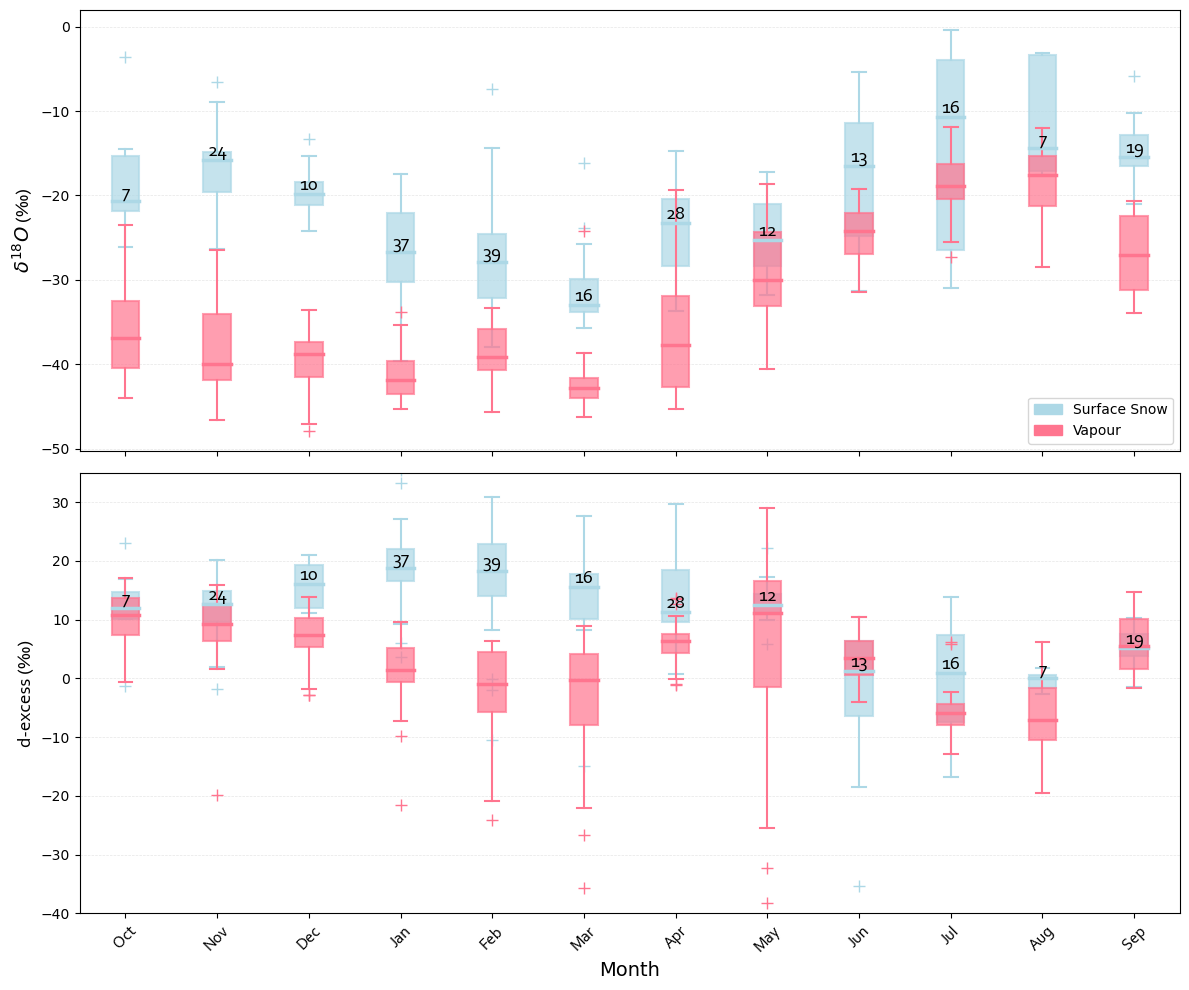

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path1 = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Box/Surface_Snow_by_month.xlsx"
file_path2 = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Figures\Box/Vap_by_month.xlsx"

d18O_data = pd.read_excel(file_path1, sheet_name='d18O')
d_excess_data = pd.read_excel(file_path1, sheet_name='d-excess')

d18O_vap_data = pd.read_excel(file_path2, sheet_name='d18O')
d_excess_vap_data = pd.read_excel(file_path2, sheet_name='d-excess')

# Prepare the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Define month labels
month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# Calculate positions for each dataset
central_positions = range(1, len(month_labels) + 1)
width_offset = 0.0  # Offset for the position of each boxplot

# Function to plot customized boxplots
def plot_customized_boxplot(ax, data1, data2, color1, color2, add_legend=False):
    positions1 = [pos - width_offset for pos in central_positions]
    positions2 = [pos + width_offset for pos in central_positions]

    bp1 = ax.boxplot([data1[month].dropna() for month in data1.columns], patch_artist=True, widths=0.3,
                     positions=positions1,
                     flierprops=dict(marker='+', markeredgecolor=color1, markerfacecolor=color1, markersize=8),
                     boxprops=dict(facecolor=color1, alpha=0.7, edgecolor=color1, linewidth=1.5),
                     whiskerprops=dict(color=color1, linewidth=1.5),
                     capprops=dict(color=color1, linewidth=1.5),
                     medianprops=dict(color=color1, linewidth=2.5))

    # Adding number of samples for the first dataset
    for i, month in enumerate(data1.columns):
        num_samples = len(data1[month].dropna())
        median_val = bp1['medians'][i].get_ydata()[0]  # Get the median value
        ax.text(positions1[i], median_val, f'{num_samples}', 
                horizontalalignment='center', verticalalignment='bottom', 
                fontsize=14, fontname='Corbel', color='black')


    bp2 = ax.boxplot([data2[month].dropna() for month in data2.columns], patch_artist=True, widths=0.3,
                     positions=positions2,
                     flierprops=dict(marker='+', markeredgecolor=color2, markerfacecolor=color2, markersize=8),
                     boxprops=dict(facecolor=color2, alpha=0.7, edgecolor=color2, linewidth=1.5),
                     whiskerprops=dict(color=color2, linewidth=1.5),
                     capprops=dict(color=color2, linewidth=1.5),
                     medianprops=dict(color=color2, linewidth=2.5))
    
    if add_legend:
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color1, edgecolor=color1, label='Surface Snow'),
                           Patch(facecolor=color2, edgecolor=color2, label='Vapour')]
        ax.legend(handles=legend_elements, loc='best')

    # Adjustments for gridlines and text
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Plotting boxplots for d18O data with legend
plot_customized_boxplot(axs[0], d18O_data, d18O_vap_data, "#ADD8E6", "#FF758F", add_legend=True)
axs[0].set_ylabel('$\\delta^{18}O$ (‰)', fontname='Corbel', fontsize=14)

# Plotting boxplots for d-excess data
plot_customized_boxplot(axs[1], d_excess_data, d_excess_vap_data, "#ADD8E6", "#FF758F")
axs[1].set_ylabel('d-excess (‰)', fontname='Corbel', fontsize=14)

# Setting y-axis limits for d-excess data
axs[1].set_ylim(-40, 35)

# Setting the x-axis labels
axs[1].set_xticks(central_positions)
axs[1].set_xticklabels(month_labels, rotation=45, fontname='Corbel', fontsize=12)
plt.xlabel('Month', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\mardakan\AppData\Local\Temp\ipykernel_23928\2807001220.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Plot saved at: C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\Box_together_12052025.jpg


C:\Users\mardakan\AppData\Local\Temp\ipykernel_23928\2807001220.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


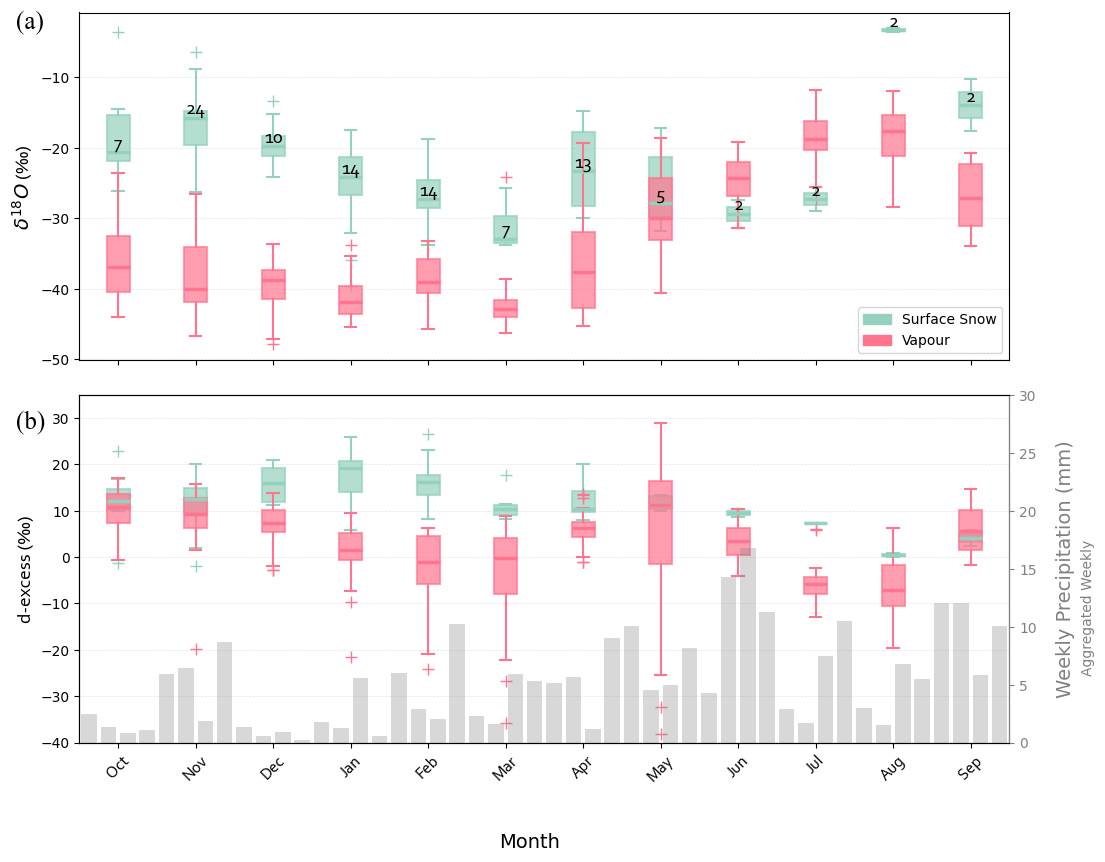

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
file_path1 = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures/Surface_Snow_by_month.xlsx"
file_path2 = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures/Vap_by_month.xlsx"
file_path3 = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures/All_Precip_Vap_Surface.xlsx"

d18O_data = pd.read_excel(file_path1, sheet_name='d18O')
d_excess_data = pd.read_excel(file_path1, sheet_name='d-excess')
d18O_vap_data = pd.read_excel(file_path2, sheet_name='d18O')
d_excess_vap_data = pd.read_excel(file_path2, sheet_name='d-excess')
precip_data = pd.read_excel(file_path3, sheet_name='Precip_weekly')

# Prepare the figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'hspace': 0.1})
ax2 = axs[1].twinx()  # Create a secondary y-axis for the bottom plot

# Define month labels and positions
month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
central_positions = range(1, len(month_labels) + 1)
width_offset = 0.0  # Offset for the position of each boxplot

# Function to plot customized boxplots
def plot_customized_boxplot(ax, data1, data2, color1, color2, add_legend=False, show_sample_size=False):
    positions1 = [pos - width_offset for pos in central_positions]
    positions2 = [pos + width_offset for pos in central_positions]

    bp1 = ax.boxplot([data1[month].dropna() for month in data1.columns], patch_artist=True, widths=0.3,
                     positions=positions1, zorder=2,
                     flierprops=dict(marker='+', markeredgecolor=color1, markerfacecolor=color1, markersize=8),
                     boxprops=dict(facecolor=color1, alpha=0.7, edgecolor=color1, linewidth=1.5),
                     whiskerprops=dict(color=color1, linewidth=1.5),
                     capprops=dict(color=color1, linewidth=1.5),
                     medianprops=dict(color=color1, linewidth=2.5))

    # Conditionally adding number of samples for the first dataset
    if show_sample_size:
        for i, month in enumerate(data1.columns):
            num_samples = len(data1[month].dropna())
            median_val = bp1['medians'][i].get_ydata()[0]  # Get the median value
            ax.text(positions1[i], median_val, f'{num_samples}', 
                    horizontalalignment='center', verticalalignment='bottom', 
                    fontsize=14, fontname='Corbel', color='black')

    bp2 = ax.boxplot([data2[month].dropna() for month in data2.columns], patch_artist=True, widths=0.3,
                     positions=positions2, zorder=2,
                     flierprops=dict(marker='+', markeredgecolor=color2, markerfacecolor=color2, markersize=8),
                     boxprops=dict(facecolor=color2, alpha=0.7, edgecolor=color2, linewidth=1.5),
                     whiskerprops=dict(color=color2, linewidth=1.5),
                     capprops=dict(color=color2, linewidth=1.5),
                     medianprops=dict(color=color2, linewidth=2.5))

    if add_legend:
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor=color1, edgecolor=color1, label='Surface Snow'),
                           Patch(facecolor=color2, edgecolor=color2, label='Vapour')]
        ax.legend(handles=legend_elements, loc='best')
        
    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)

# Plotting boxplots for d18O and d-excess data with sample size on the upper subplot
plot_customized_boxplot(axs[0], d18O_data, d18O_vap_data, "#94d2bd", "#FF758F", add_legend=True, show_sample_size=True)
axs[0].set_ylabel('$\\delta^{18}O$ (‰)', fontname='Corbel', fontsize=14)

plot_customized_boxplot(axs[1], d_excess_data, d_excess_vap_data, "#94d2bd", "#FF758F")
axs[1].set_ylabel('d-excess (‰)', fontname='Corbel', fontsize=14)
axs[1].set_ylim(-40, 35)

# Setting y-axis limits for d-excess data
axs[1].set_ylabel('d-excess (‰)', fontname='Corbel', fontsize=14)
axs[1].set_ylim(-40, 35)

# Adding bar chart for weekly precipitation data on the secondary y-axis
weekly_precip = precip_data['ERA5_agg_weekly_precipitation_mm']
week_positions = []
bar_width = 0.2
bar_offset = 0.25  # Offset between bars

# Assuming each month has approximately the same number of weeks
weeks_per_month = len(weekly_precip) / len(month_labels)

for i, month_pos in enumerate(central_positions):
    start_pos = month_pos - weeks_per_month / 2 * bar_offset + bar_offset / 2
    for week in range(int(weeks_per_month)):
        week_positions.append(start_pos + week * bar_offset)

ax2.bar(week_positions[:len(weekly_precip)], weekly_precip, width=bar_width, color='grey', alpha=0.3, label='Weekly Precipitation', zorder=0)
ax2.set_ylim(0, 30)  # Adjust if necessary
ax2.set_ylabel('Weekly Precipitation (mm)', fontsize=14)
#Manually add the secondary line of text
fig.text(0.96, 0.22, 'Aggregated Weekly', fontsize=10, rotation='vertical', color='grey')  # Adjust position and rotation as needed
ax2.yaxis.set_label_coords(1.05, 0.5)  # Adjust label position if needed
# Change the color of the line and ticks of the secondary y-axis
ax2.spines['right'].set_color('grey')  # Changing the color of the right spine
ax2.tick_params(axis='y', colors='grey')  # Changing the color of the y-axis ticks
ax2.yaxis.label.set_color('grey')  # Changing the color of the y-axis label

# Setting the x-axis labels and other plot properties
axs[1].set_xticks(central_positions)
axs[1].set_xticklabels(month_labels, rotation=45, fontname='Corbel', fontsize=12)
# Set the x-axis label for the entire figure
fig.text(0.5, 0.05, 'Month', ha='center', va='center', fontsize=14)

# Add labels "a)" and "b)" next to the subplots
fig.text(0.072, 0.865, "(a)", fontdict={'fontname': 'Times New Roman', 'fontsize': 18}, transform=fig.transFigure)
fig.text(0.072, 0.465, "(b)", fontdict={'fontname': 'Times New Roman', 'fontsize': 18}, transform=fig.transFigure)

# Save the plot as a JPEG with 600 dpi
output_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Second Submission - Elementa\Revisions\Data_Figures\Box_together_12052025.jpg"
plt.savefig(output_file_path, dpi=600, bbox_inches='tight')
print(f"Plot saved at: {output_file_path}")

# Show the plot
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.show()